<a href="https://colab.research.google.com/github/ujjwalbatraji/My-notebooks/blob/main/Ujjwal_First_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#servo prediction using linear regression

Get understanding about Data set


What is Servo: In control engineering a servomechanism, usually shortened to servo, is an automatic device that uses error-sensing negative feedback to correct the action of a mechanism. On displacement-controlled applications, it usually includes a built-in encoder or other position feedback mechanism to ensure the output is achieving the desired effect. The term correctly applies only to systems where the feedback or error-correction signals help control mechanical position, speed, attitude or any other measurable variables. For example, an automotive power window control is not a servomechanism, as there is no automatic feedback that controls position-the operator does this by observation. By contrast a car's cruise control uses closed-loop feedback, which classifies it as a servomechanism.

A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo system involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the translational axes of a robot on the 9th floor of the Al lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point. The variables that describe the data set and their values are the following:

1. Motor A,B,C,D,E

2. Screw A,B,C,D,E

3. Pgain 3,4,5,6

4. Vgain 1,2,3,4,5

5. Class 0.13 to 7.10

#Import library

In [ ]:
import pandas as pd
import numpy as np

#Import csv and dataframes

Use url of file directly

In [ ]:
df = pd.read_csv(r'https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv')

#Get the first five Rows of dataframes

In [ ]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


#Get information of Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


#Get the summary statistics

In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [ ]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

#Get shape of dataframe

In [ ]:
df.shape

(167, 5)

#Get categories andcounts of categorical variables

In [ ]:
df[['Motor']].value_counts()

,count
Motor,
C,40
A,36
B,36
E,33
D,22


In [ ]:
df[['Screw']].value_counts()

,count
Screw,
A,42
B,35
C,31
D,30
E,29


#Get encoding of categorical features

In [ ]:
df.replace({'Motor' :{'A':0 ,'B':1 ,'C':2 ,'D':3, 'E':4}}, inplace=True)

In [ ]:
df.replace({'Screw' :{'A':0 ,'B':1 ,'C':2 ,'D':3, 'E':4}}, inplace=True)

#Define y (dependent or target variable) and x (independent or feature variable)

In [ ]:
y = df['Class']

In [ ]:
y.shape

(167,)

In [ ]:
y

,Class
0,4
1,11
2,6
3,48
4,6
5,20
6,46
7,49
8,19
9,27


In [ ]:
x = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [ ]:
x.shape

(167, 4)

In [ ]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


#Get train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size =0.3 , random_state=2529)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50, 4), (117, 4), (50,), (117,))

#Get Model Train

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(x_train , y_train)

LinearRegression()

#Get model Prediction

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred.shape

(117,)

In [ ]:
y_pred

array([ 24.89015109,  28.08391972,  17.55257369,  19.57157488,
        37.1210723 ,  23.02101376,  11.31490029,  17.33873833,
        38.79851087,  39.51501737,  12.99233887,  22.61547965,
        15.87513511,  11.6564629 ,  19.26060249,  16.93320422,
        -4.46259683,  29.92246682,  31.59990539,  -3.35180088,
        30.72229038,  30.8833989 ,  32.80526306,  27.12298763,
        14.53925915,   6.09088581,  27.33682299,  14.70036767,
        21.65454756,   3.45251515,  29.01426157,  22.77658817,
        34.23827605,  28.80042621,   8.30158575,   3.20808956,
        17.8941363 ,  29.76135829,  12.61739498,  36.16014022,
        27.52852175,  19.01617691,   7.34065367,   5.66321509,
        30.1668924 ,  28.24502824,  32.56083747,   4.16902164,
        20.69361548,  18.05524482,  24.45402675,   7.58507925,
        22.58488942,  33.11623545,  15.25576564,   0.5697189 ,
        36.87664671,   0.81414449,  16.21669772,  -1.82422617,
        22.06008168,  30.47786479,  23.52368489,  24.48

#Get model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error,  mean_absolute_error , r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

73.57022323365531

In [ ]:
mean_absolute_error(y_test, y_pred)

7.158141394974153

In [ ]:
r2_score(y_test,y_pred)

0.6372902527668625

#Get visualisation of Actual Vs Predicted results

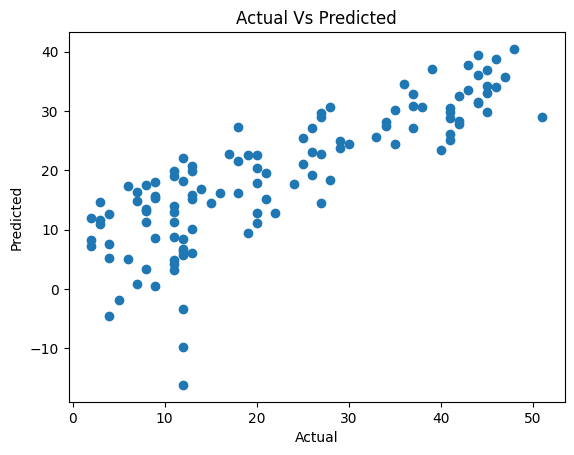

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title( 'Actual Vs Predicted')
plt.show()

#Get Future Predictions

Lets select a random sample from existing dataset as new value

steps to follow:

     1. Extract a random row using sample function
     2. Seperate X and Y
     3. Standarrdize X
     4. Predict

In [ ]:
x_new = df.sample(1)

In [ ]:
x_new

,Motor,Screw,Pgain,Vgain,Class
147,3,3,3,2,35


In [ ]:
x_new.shape

(1, 5)

In [ ]:
x_new = x_new.drop('Class', axis =1)

In [ ]:
x_new

,Motor,Screw,Pgain,Vgain
147,3,3,3,2


In [ ]:
x_new.shape

(1, 4)

In [ ]:
y_pred_new= model.predict(x_new)

In [ ]:
y_pred_new

array([29.20596032])